In [8]:
# Importing Modules
import sys
import pandas as pd
from IPython.display import display, Markdown
import io
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Source folder
sys.path.append("../src") 

from data_loader import load_all_transaction_data 
DATA_PATH = "../data"

# Loading all transaction data
df = load_all_transaction_data(DATA_PATH)

display(Markdown("### ✅ Data Loaded Successfully"))
display(Markdown(f"**Total Rows:** {df.shape[0]} &nbsp;&nbsp;|&nbsp;&nbsp; **Total Columns:** {df.shape[1]}"))

# Result of Import
display(df.head())

### ✅ Data Loaded Successfully

**Total Rows:** 1754155 &nbsp;&nbsp;|&nbsp;&nbsp; **Total Columns:** 9

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0


In [10]:
# Dataset Info
display(Markdown("### 📊 Data Overview"))

# Capture df.info
buffer = io.StringIO()
df.info(buf=buffer)
info_str = buffer.getvalue()
display(Markdown(f"```\n{info_str}\n```"))

### 📊 Data Overview

```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   TRANSACTION_ID     int64         
 1   TX_DATETIME        datetime64[ns]
 2   CUSTOMER_ID        object        
 3   TERMINAL_ID        object        
 4   TX_AMOUNT          float64       
 5   TX_TIME_SECONDS    object        
 6   TX_TIME_DAYS       object        
 7   TX_FRAUD           int64         
 8   TX_FRAUD_SCENARIO  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 120.4+ MB

```

In [11]:
# Fraud Class Distribution
display(Markdown("### ⚖️ Fraud Class Distribution"))
fraud_counts = df['TX_FRAUD'].value_counts().rename_axis("Fraud").reset_index(name='Count')
display(fraud_counts)

### ⚖️ Fraud Class Distribution

,Fraud,Count
0,0,1739474
1,1,14681


In [12]:
# Fraud Scenario Distribution
display(Markdown("### 🧪 Fraud Scenario Distribution"))
scenario_counts = df['TX_FRAUD_SCENARIO'].value_counts().rename_axis("Scenario").reset_index(name='Count')
display(scenario_counts)

### 🧪 Fraud Scenario Distribution

,Scenario,Count
0,0,1739474
1,2,9077
2,3,4631
3,1,973


In [13]:
# Date Range of Transactions
display(Markdown("### 🗓️ Transaction Date Range"))
min_date = df['TX_DATETIME'].min()
max_date = df['TX_DATETIME'].max()
display(Markdown(f"**From:** `{min_date}` &nbsp;&nbsp; **To:** `{max_date}`"))

### 🗓️ Transaction Date Range

**From:** `2018-04-01 00:00:31` &nbsp;&nbsp; **To:** `2018-09-30 23:59:57`

### 🔍 Fraud Ratio: **0.83693%**

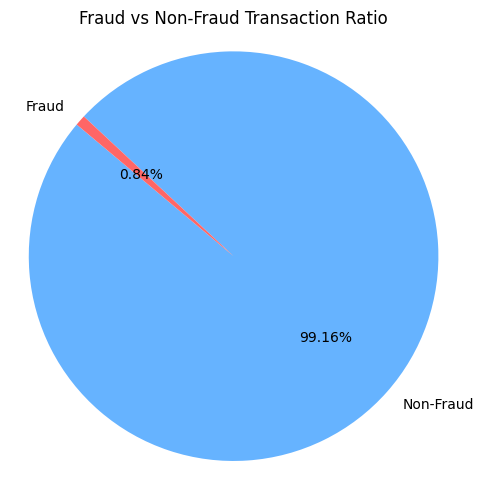

In [14]:
# Fraud ratio
fraud_ratio = df['TX_FRAUD'].mean()

# Displaying result
display(Markdown(f"### 🔍 Fraud Ratio: **{fraud_ratio:.5%}**"))
labels = ['Non-Fraud', 'Fraud']
sizes = [(1 - fraud_ratio), fraud_ratio]
colors = ['#66b3ff', '#ff6666']

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', colors=colors, startangle=140)
plt.title("Fraud vs Non-Fraud Transaction Ratio")
plt.axis('equal')
plt.tight_layout()
plt.show()

### 💰 Transaction Amount Distribution (Log Y-Axis)

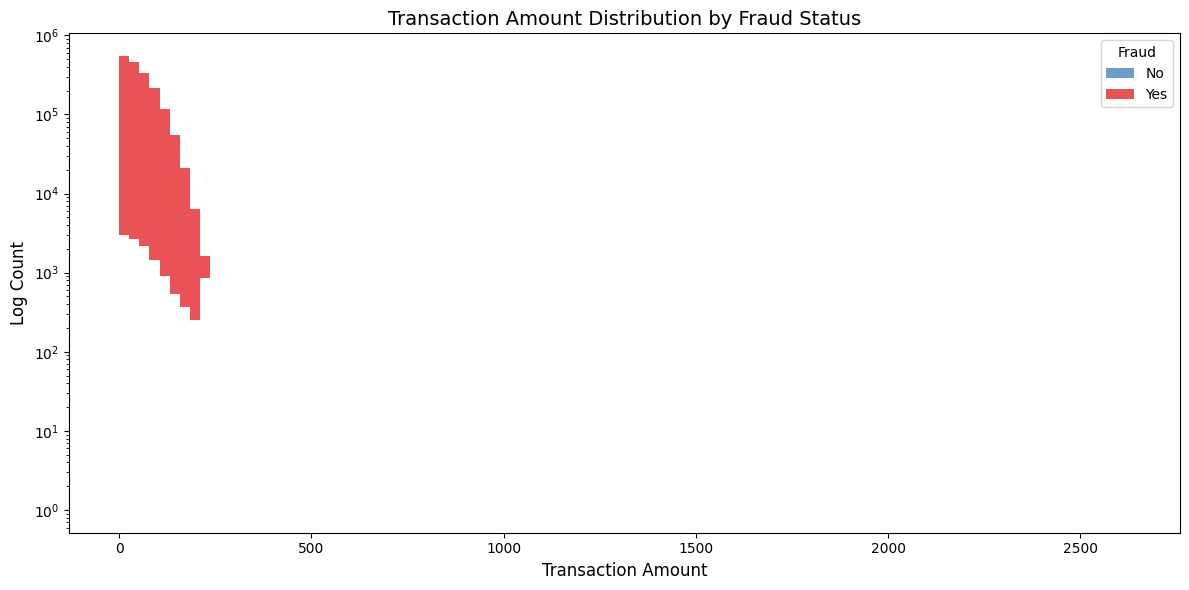

In [15]:
# Distribution by Fraud Status
display(Markdown("### 💰 Transaction Amount Distribution (Log Y-Axis)"))

plt.figure(figsize=(12, 6))
sns.histplot(
    data=df,
    x='TX_AMOUNT',
    bins=100,
    log_scale=(False, True),
    hue='TX_FRAUD',
    multiple="stack",
    palette="Set1",
    edgecolor='none'
)

plt.title("Transaction Amount Distribution by Fraud Status", fontsize=14)
plt.xlabel("Transaction Amount", fontsize=12)
plt.ylabel("Log Count", fontsize=12)
plt.legend(title="Fraud", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

### 📆 Daily Transactions: Legitimate vs Fraudulent

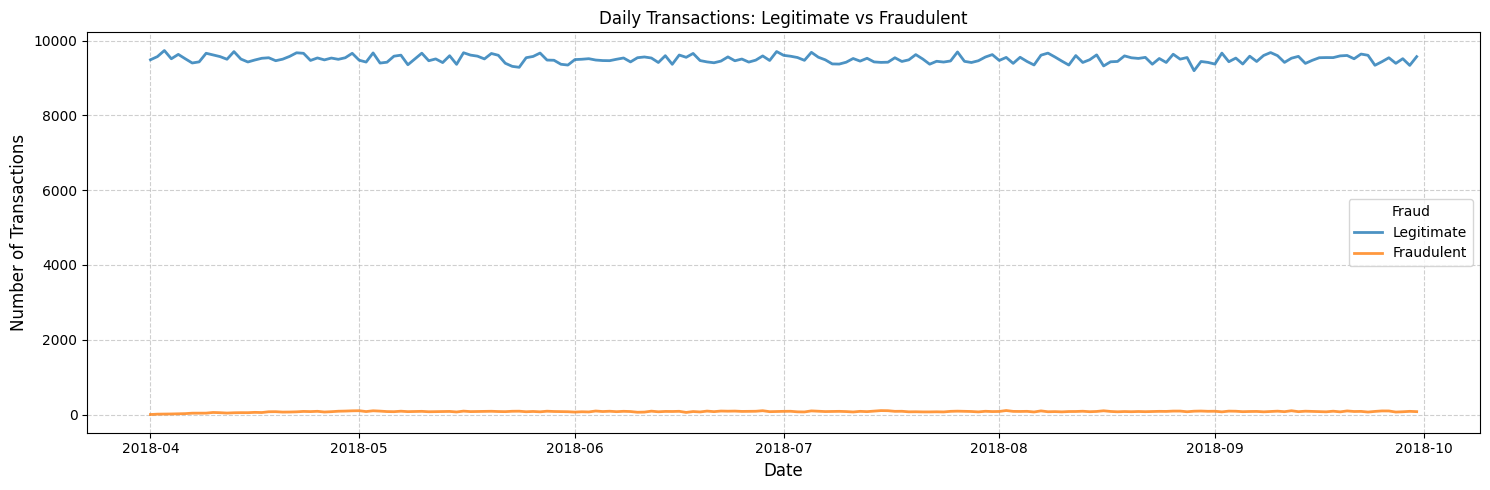

In [16]:
# Extracting date from datetime
df['TX_DATE'] = df['TX_DATETIME'].dt.date
daily_counts = df.groupby(['TX_DATE', 'TX_FRAUD']).size().unstack(fill_value=0)

# Plotting daily transaction
display(Markdown("### 📆 Daily Transactions: Legitimate vs Fraudulent"))
ax = daily_counts.plot(
    figsize=(15, 5),
    title="Daily Transactions: Legitimate vs Fraudulent",
    linewidth=2,
    alpha=0.8
)

# Displaying
ax.set_ylabel("Number of Transactions", fontsize=12)
ax.set_xlabel("Date", fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(title="Fraud", labels=["Legitimate", "Fraudulent"])
plt.tight_layout()
plt.show()